In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#Congigs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [ ]:
#Load dataset
df = pd.read_csv("./data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Count values of "exang"
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

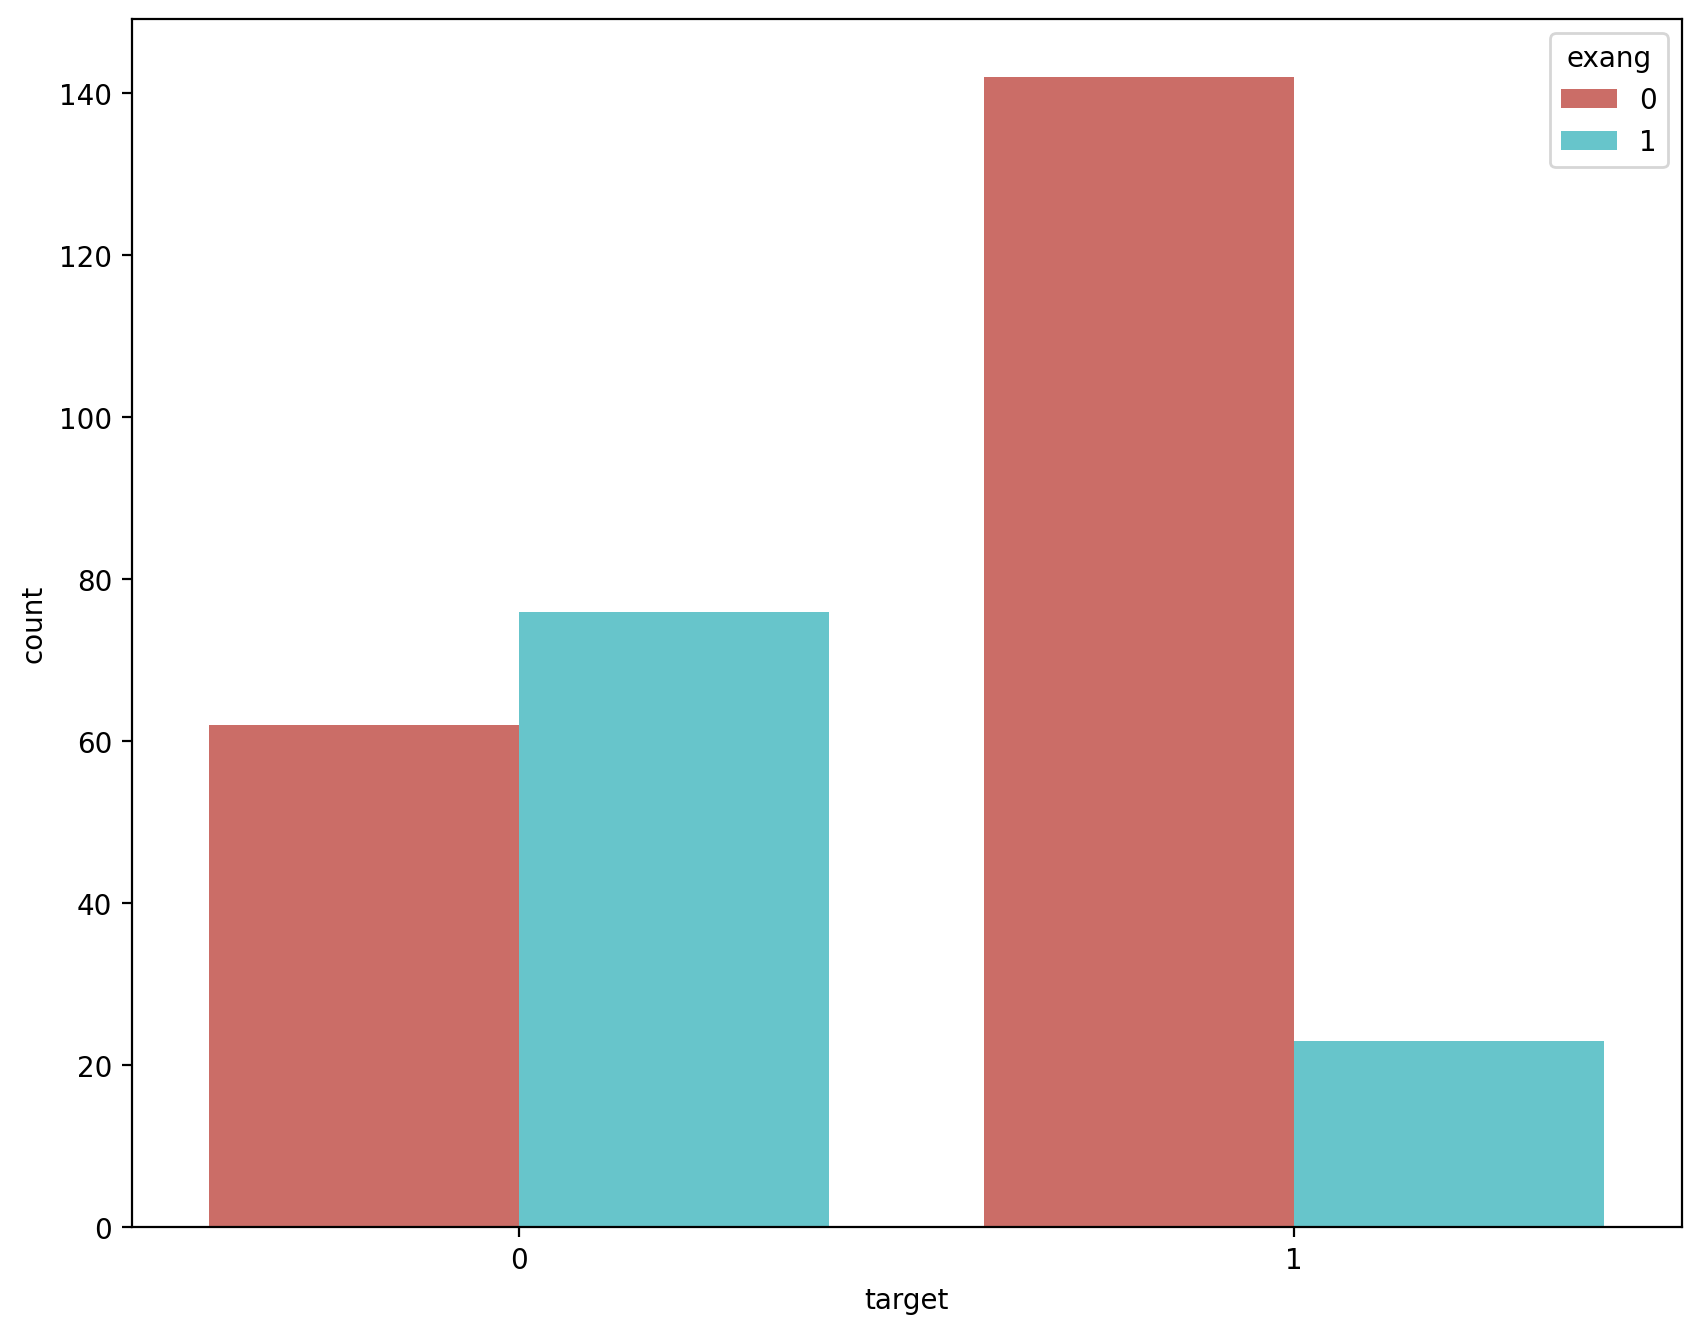

In [ ]:
#Visualize values of "exang" and "target"
sns.countplot(x='target', hue='exang', data=df, palette='hls')
plt.show()

In [ ]:
#Count values of "fbs"
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

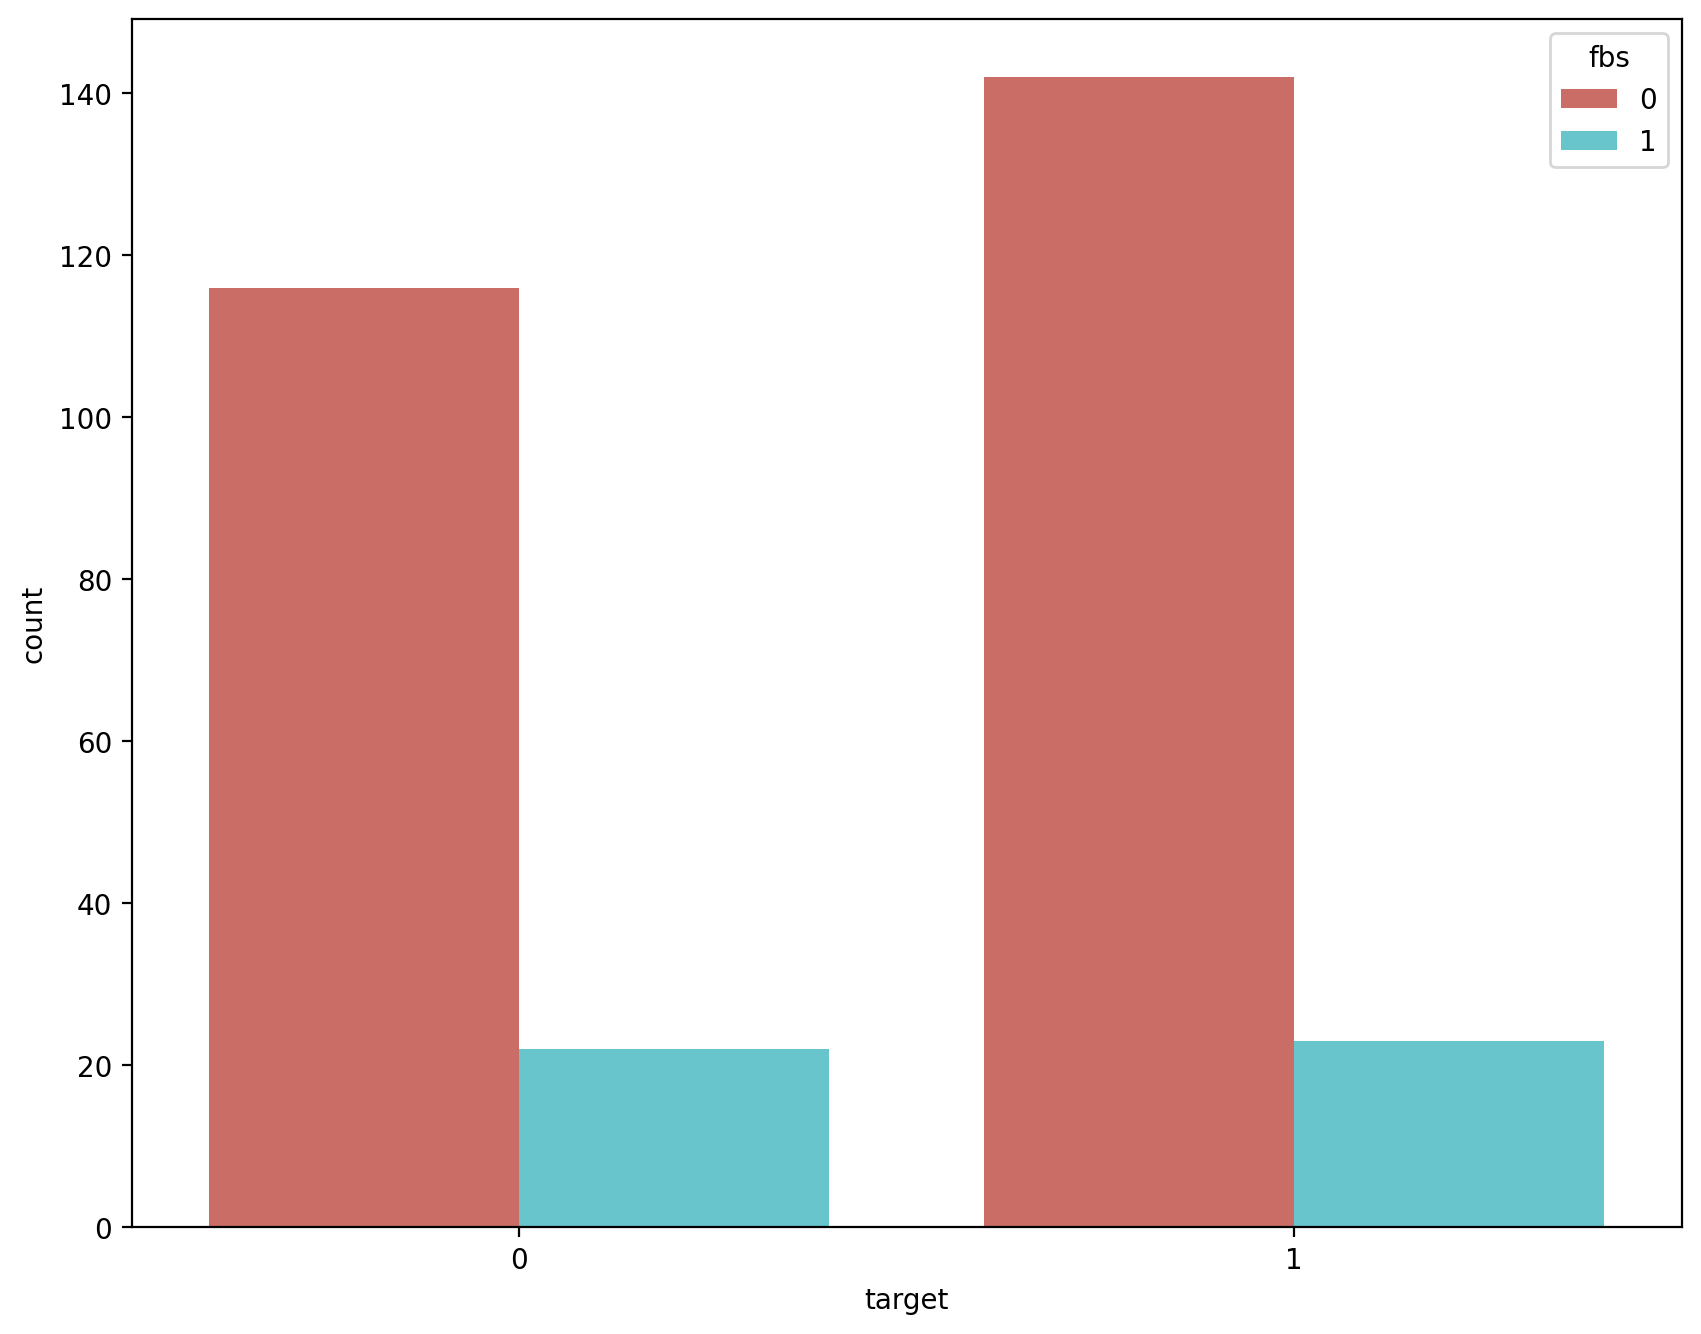

In [ ]:
#Visualize values of "fbs" and "target"
sns.countplot(x='target', hue='fbs', data=df, palette='hls')
plt.show()

In [ ]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(df[['exang', 'fbs']], df.target, test_size=0.3, random_state = 0)

In [ ]:
#Create model
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
#Get results
intercept = model.intercept_
coefs = model.coef_
print('Intercept:', intercept)
print('Coef:', coefs)

Intercept: [0.9559421]
Coef: [[-1.86119766 -0.48928988]]


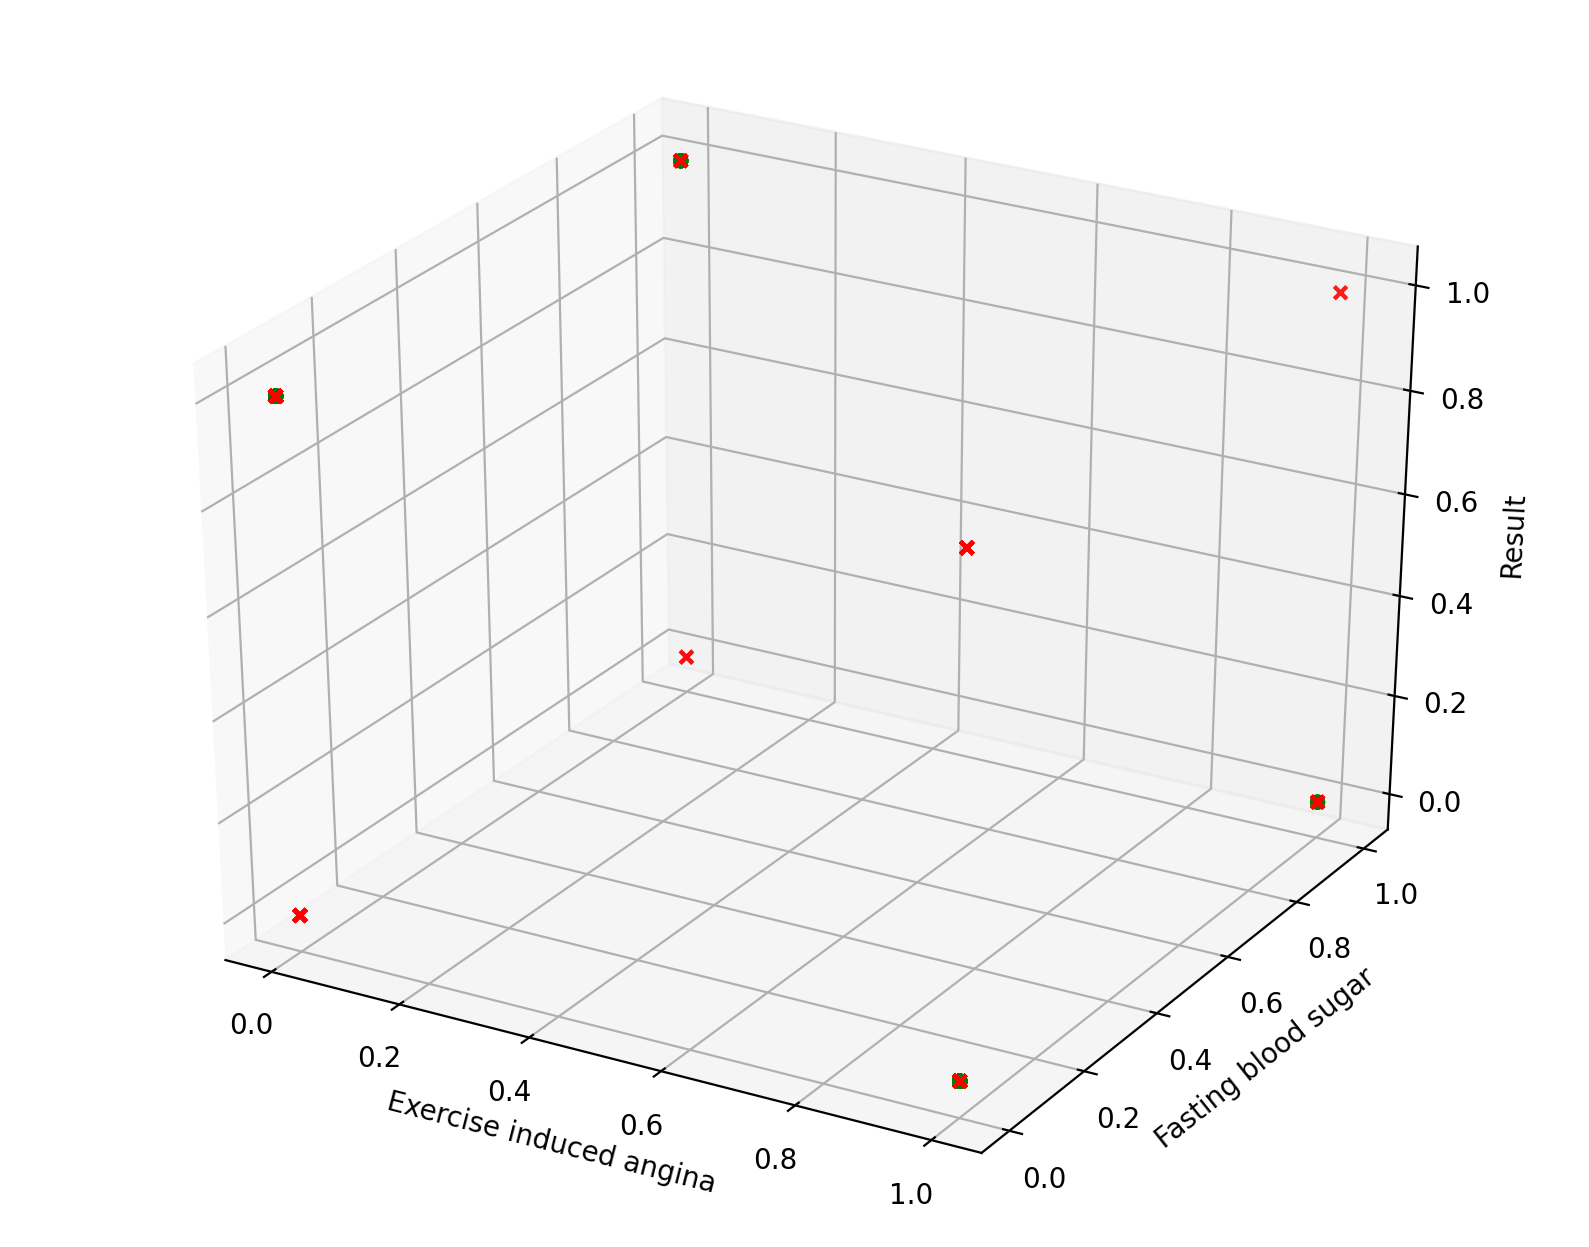

In [ ]:
#Visualization
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs2 = (X_train.exang)
ys2 = (X_train.fbs)
zs2 = (model.predict(X_train))
ax.scatter(xs2, ys2, zs2, color='green', marker='o')
xs3 = (X_train.exang)
ys3 = (X_train.fbs)
zs3 = (y_train)
ax.scatter(xs3, ys3, zs3, color='r', marker='x')
ax.set_xlabel('Exercise induced angina')
ax.set_ylabel('Fasting blood sugar')
ax.set_zlabel('Result')
plt.show()

In [ ]:
#Predict on test set
y_pred = model.predict(X_test)
new = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
new.head(10)

,Actual value,Predicted value
225,0,0
152,1,1
228,0,1
201,0,0
52,1,1
245,0,1
175,0,0
168,0,1
223,0,0
217,0,0


In [ ]:
#Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[21, 23],
       [ 5, 42]])

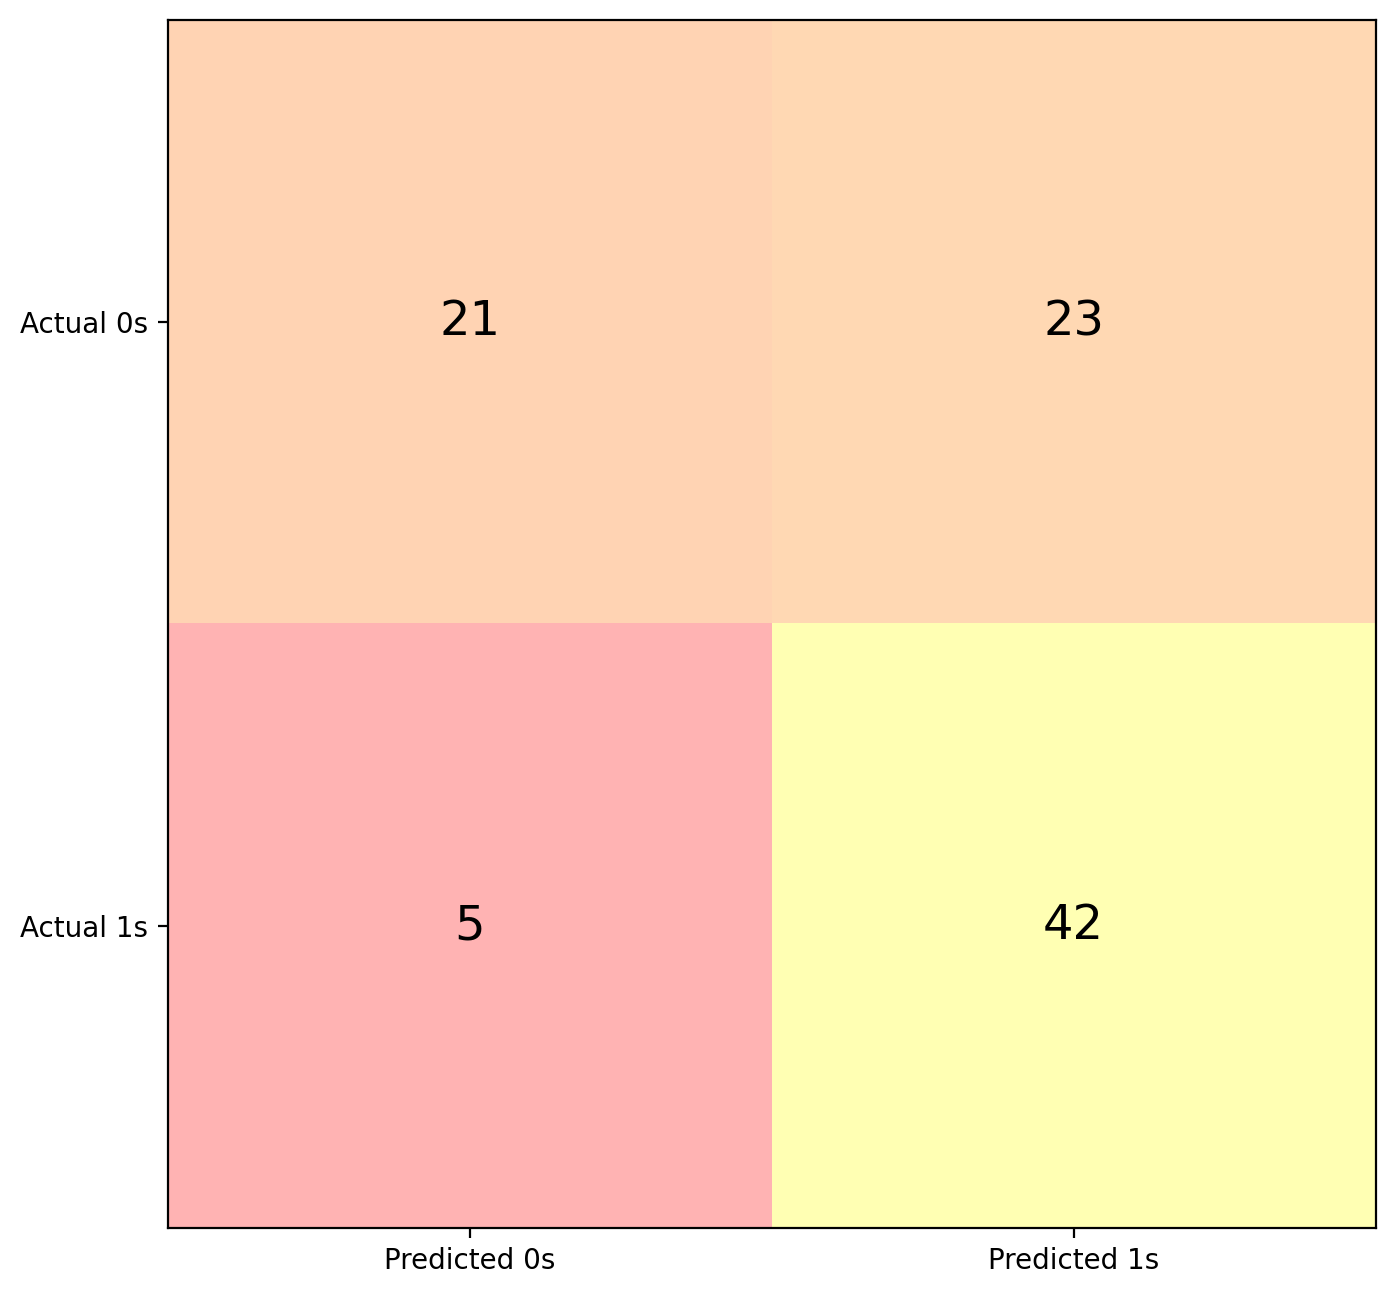

In [ ]:
#Visualize confusion matrix
fig, ax = plt.subplots()
ax.imshow(cnf_matrix, cmap=plt.cm.autumn, alpha=0.3)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range (2):
    for j in range (2):
        ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.show()

In [ ]:
#Evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.48      0.60        44
           1       0.65      0.89      0.75        47

    accuracy                           0.69        91
   macro avg       0.73      0.69      0.68        91
weighted avg       0.72      0.69      0.68        91

